## <p style="text-align: center;">Slutuppgift statistiska metoder</p>

- Sara Gunnars
- AI22
- 2023-08-31

I denna rapport så kommer jag att analysera samt dra slutsatser kring datasetet Wines. Jag kommer utgår ifrån ett antal frågeställningar och besvara dessamed hjälp av statistiska metoder. I den inledande delen av rapporten bekräknas deskriptiv statistik som syftar till att ge en överblick över datan jag arbetar med. Därefter kommer även utförs hypotest, beräkning av konfidensintervall, korrelation och enkel linjär regression.  

Datasetet som används i uppgifter bygger på kemiska analyser av tre olika sorters druvor från samma region i Italien.

Innan jag börjar med uppgifterna kommer jag att importera passande python paket, läsa in datasetet samt namnge varje column.

In [35]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [36]:
#Lista med kolumn namn
colnames = ['WineId', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 
            'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline']

#läser in dataset
df = pd.read_csv('Data/wine/wine.csv', names= colnames, header= None)

#random seed
random_seed = 2023

#en överblick över datasetet
df.head()

,WineId,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [37]:
#Inga värden som saknas
df.isna().value_counts()

WineId  Alcohol  Malic_acid  Ash    Alcalinity_of_ash  Magnesium  Total_phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity  Hue    OD280/OD315_of_diluted_wines  Proline
False   False    False       False  False              False      False          False       False                 False            False            False  False                         False      178
Name: count, dtype: int64

### <p style="text-align: center;">Deskriptiv statistik </p>

#### 1. Alkoholhaltens medelvärde och standardavvikelse

#### Formel för medlevärde : $\frac{\sum_{X}^{}}{n}$ samt formeln för standardavvikelsen :$\sqrt{\frac{\sum_{x-\hat{x}^{2}}^{}}{n-1}}$

- Vid beräknande av medelvärde så summerar vi samtliga observationsvärden (x) och delar dessa i antalet (n)
- Vid beräknande av standarrdavvikelse beräknar vi summan av observationsvärdernas kvadrerade avvikelserna från medelvärdet, delat på antalet minus 1. Därefter tar vi roten ur denna summa.

In [38]:
#Grupperar datan efter vin ID samt beräknar medelvärde och standardavvikelse för varje grupp
alcohol_mean_std = df.groupby(['WineId'], as_index= False).agg({'Alcohol': ['mean', 'std']})
alcohol_mean_std

WineId    Alcohol          
               mean       std
0      1  13.744746  0.462125
1      2  12.278732  0.537964
2      3  13.153750  0.530241

In [39]:
#delar upp dataframe i medelvärde och standardavvikelse då jag kommer använda detta i en plott nedan
alcohol_mean = alcohol_mean_std['Alcohol']['mean']
alcohol_std = alcohol_mean_std['Alcohol']['std']
#avrundat till två decimaler
alcohol_mean = round(alcohol_mean, 2)
alcohol_std = round(alcohol_std, 2)

### Histogram av alkoholhalt med medelvärrde som vertikal linje

In [40]:
#Dataframes för varje druva
wine_1 = df.loc[df['WineId'] == 1]
wine_2 = df.loc[df['WineId'] == 2]
wine_3 = df.loc[df['WineId'] == 3]

#dict med de tre olika druv df
wine_dict = {'Druva 1': wine_1, 'Druva 2': wine_2, 'Druva 3': wine_3}

In [41]:
test1 = wine_1['Alcohol'].mean()
test2 = wine_1['Alcohol'].median()
test3 = wine_1['Alcohol'].mode()

print(f"Answer: {test1}")
print(f"Answer: {test2}")
print(f"Answer: {test3}")

Answer: 13.744745762711865
Answer: 13.75
Answer: 0    13.05
Name: Alcohol, dtype: float64


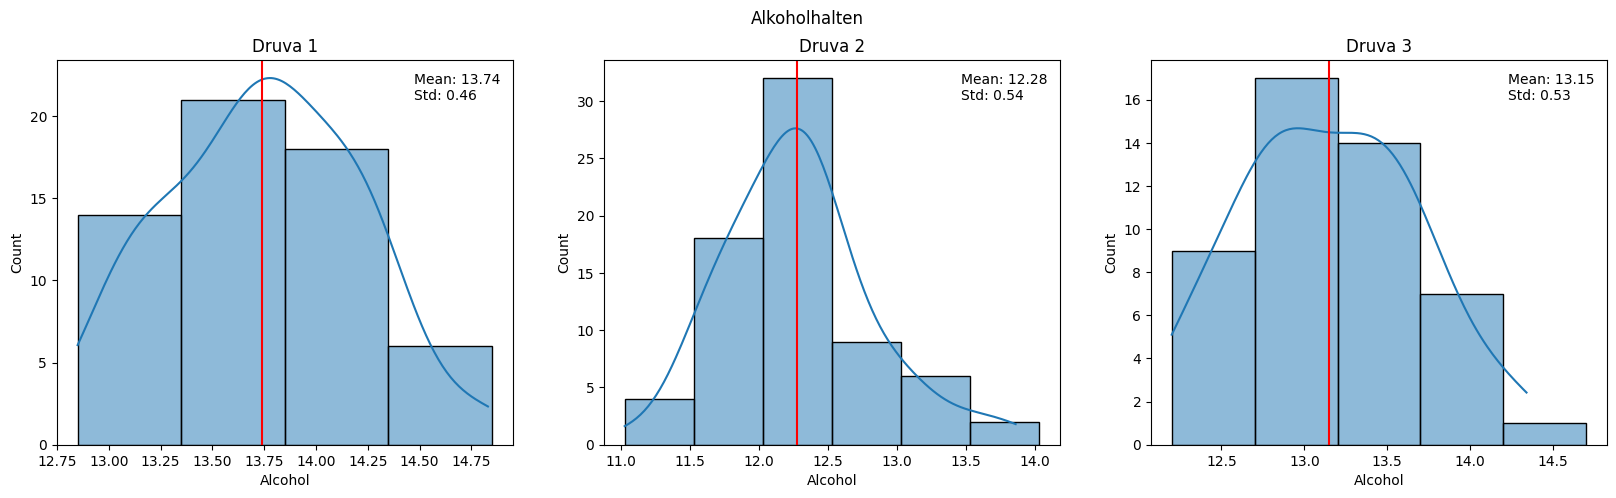

In [42]:
#skapar figur, sätter upp tre subplots samt titel
from matplotlib.offsetbox import AnchoredText
fig, ax = plt.subplots(1,3, figsize = (20,5))
fig.suptitle('Alkoholhalten')


for i, grape in enumerate(wine_dict): 
    
    ax[i].set_title(f'{grape}') #subplot titel
    sns.histplot(ax = ax[i], data= wine_dict[grape], x= 'Alcohol',  binwidth= 0.5,kde= True) #den data vi önskar plotta
    ax[i].axvline(x = alcohol_mean[i], ymin = 0, ymax = 1, color = 'red') #adderar vertikal linje för medelvärdet
    
    #text ruta med medelvärde och standardavvikelsee
    anc = AnchoredText(f'Mean: {alcohol_mean[i]}\nStd: {alcohol_std[i]}', loc="upper right", frameon=False)
    ax[i].add_artist(anc)
   
       

#### Analys av histogram
Jag valde att i även inkludera en kernel determination estimator för att göra analysen av fördelningen tydligare. Som vi kan se så sticker värderna av samtliga druvor ut lite. Jag skulle därmed säga att ingen av histogrammen är normalfördelade. Det ser ut  som att druva ett har en lätt negativ skevhet medan druva två och tre har en lätt positiv skevhet.

### <p style="text-align: center;">Hypotestest och konfidensintervall</p>

#### 2) Hypotestest

Jag ska nu utföra ett hypotestest där vi ska testa om mängden proantocyaniner är lägre en 1.75. Vi vill att testet ska utföras med konfidensnivå på 95% vilket innebär att vi kommer att sätta vår signifikansnivå till 5%. Detta representerar risken för att vi begår ett typ-1 fel. Vilket innebär att vi förkastar nollhypotesen trots att den var sann.

- Hypotes: Mängden proantocyaniner är lägre än 1.75
- H0 >= 1.75
- H1 < 1.75
- Signifikanssnivå = 0.05
- n = 15 (stickprovets storlek)
- df (degrees of freedom) = n -1 = 14
- kritiskt t-värde = -1.761. Detta får vi fram genom att söka i en t-tabel. Jag använde denna: https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf  Jag läser av tabellen genom att först säka av längst med axeln för degrees of freedom, och därefter den bestämda konfidensnivån.

Det kritiska t-värdet blir negativt då vår hypotes är att populationsmedelvärrdet är mindre än 1.75. Detta innebär att vi förkastar nollhypotesen om t < -1.761 

Vi kommer utföra ett one t-tail test. Detta då noll hypotesen endast kan vara lika med eller större än alternativ hypotesen.

## Formeln för t-test är $t = \frac{\widehat{x}-\mu0}{s/\sqrt{n}}$

- $\widehat{x}$ är stickprovssmedelvärdet
- $\mu0$ är det hypotetiska populationssmedelvärdet. I detta fall 1.75
- s = stickprovets standardavvikelse
- n = 15

Jag saknar nu några värden för formeln ovan och behöver därför börja med att beräkna stickprovets medelvärde samt standardavvikelse.

In [43]:
#Stickprov på 15 värdern från druvssort 2
wine_2_sample = wine_2.sample(n = 15, random_state= random_seed)

In [44]:
#stickprovets standardavvikelse
wine_2_sample_std = wine_2_sample['Proanthocyanins'].std()
wine_2_sample_std = round(wine_2_sample_std, 2)
#stickprrovets medelvärde
wine_2_sample_mean = wine_2_sample['Proanthocyanins'].mean()
wine_2_sample_mean = round(wine_2_sample_mean, 2)

print(f'Medelvärdet är : {wine_2_sample_mean}')
print(f'Standardavvikelse är : {wine_2_sample_std}')

Medelvärdet är : 1.49
Standardavvikelse är : 0.56


#### Detta resulterar i följande ekvation:

#### $t = \frac{1.49-1.75}{0.56/\sqrt{15}}$

#### $t = -1.798$ 

In [45]:
#one tailed t-test in scipy
t_stat, p_value = st.ttest_1samp(a = wine_2_sample['Proanthocyanins'], popmean= 1.75)
print(f't = {t_stat}')
print(f'p_value = {p_value}')

t = -1.7988753571133511
p_value = 0.09362545860302458


#### Analys av resultatet utfört test med scipy

Vi fick här fram ungefär samma t-värde som när jag själv beräknade, detta värde innebär att vi inte förkastar noll hypotesen, då denna är mindre än det kritiska t-värdet på -1.761
Då scipy inte presenterar de kritiska t-värdet för oss, kikar man istället på det presenterade p-värdet. Är värdet mindre än vår signifikansnivå (.05) förkastas nollhypotesen. I detta fall fick vi ett p-värde på 0.09 vilket innebär att nollhypotesen inte bör förkastas.

### 3) Konfidensintervall

In [47]:
# Stickprov på 20 värden från druvsort 2 och 3
wine_2_sample_twenty = wine_2.sample(n = 20, random_state= random_seed)
wine_3_sample_twenty = wine_3.sample(n = 20, random_state= random_seed)

Jag ska nu konstruera ett 95% konfidensintervall för skillnaden i fenolhalten mellan druva 2 och 3. Konfidensintervallen kommer beräkna skillnaden i medelvärde mellan de två stickproven och formeln jag använder för detta är:

$\left(\mathrm{\overline{x}}_{1}-\mathrm{\overline{x}}_{2}^{}\right)\pm \mathrm{t}_{\sigma/2,}\text{df}\sqrt{\frac{\left( \mathrm{n}_{1}-1\right)\mathrm{s}_{1}^{2}+\left( \mathrm{n}_{2}-1\right)\mathrm{s}_{2}^{2}}{\mathrm{n}_{1}+\mathrm{n}_{2}-2}}$

$\left(\mathrm{\overline{x}}_{1}-\mathrm{\overline{x}}_{2}^{}\right)$ är vardera stickprovs medelvärde

$t^{*}$ = kritiskt t-värde och återfinns i denna tabel https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf

För att få fram vårt kritiska t-värde går vi in i t-tabellen, kikar på vår degree of freedom samt konfidensnivå

Degrees of freedom = $\frac{\left( \left( \mathrm{s}_{1}^{2} \right) /\mathrm{n}_{1}+\left( \mathrm{s}_{2}^{2} \right) /\mathrm{n}_{2}\right)}{\left( \mathrm{s}_{1}^{2} /\mathrm{n}_{1}\right)^{2}/\left( \mathrm{n}_{1}-1\right)+\left( \mathrm{s}_{2}^{2} /\mathrm{n}_{2}\right)^{2}/\left( \mathrm{n}_{2}-1 \right)}$

$\mathrm{n}_{1}$ och $\mathrm{n}_{2}$ är sample storlekarna

$\mathrm{s}_{1}$ och $\mathrm{s}_{2}$ är standardavikelsen för vardera sample

In [62]:
#Konfidensintervallen med hjälp av Scipy
from scipy.stats import ttest_ind

#stickprov med fenolhalten
phenols_2 = wine_2_sample_twenty['Total_phenols']
phenols_3= wine_3_sample_twenty['Total_phenols']

In [63]:
#t-test för differans i medelvärden mellan två stickprov
#equal_var = Falsk då jag antagit att populationsstandardavvikelserna är okända och ej antas lika
ttest_ind(phenols_2, phenols_3, equal_var= False) 

TtestResult(statistic=3.9314464068463324, pvalue=0.0004334959663182267, df=31.46858302868537)

Testet ovan sätter nollhypotesen: Det finns ingen skillnad mellan  medelvärdena av våra två samples.
Som vi kan se får vi ett väldigt lågt p-värde, lägre än vår signifikansnivå  på 0.05. Vi förkastar därmed nollhypotesen då det verkar finnas signifikant skillnad mellan medelvärdena för vardera stickprov.

Förändrar vi stickprovsstorleken kan även formeln vi anväder oss av att bytas från att vi använder oss av t till z. Detta då stickprov med fler samples än 30 inte nyttjar t tabellen.

Förändrar vi konfidensgraden så förändras automatiskt också signifikansnivån. Med en högre konfidensgrad sjunker signifikansnivån, vilket innebär att vi är mindre benägna att förkasta nollhypotesen. Sänker vi dock konfidesnivån ökar signifikansnivån. Detta innebär att rikseen för ett typ-1 fel ökar. Typ-1 fel innebär att vi förkastar nollhypotesen trots att den visar sig vara sann.